In [1]:
import pandas as pd
from IPython.display import display_html
from sklearn import tree
from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def toy_dataset():
    animal = [
        ['human',1,1,0,0,1,0,'mammals'], 
        ['python',0,0,0,0,0,1,'reptiles'],
        ['salmon',0,0,1,0,0,0,'fishes'],
        ['whale',1,1,1,0,0,0,'mammals'],
        ['frog',0,0,1,0,1,1,'amphibians'],
        ['komodo',0,0,0,0,1,0,'reptiles'],
        ['bat',1,1,0,1,1,1,'mammals'],
        ['pigeon',1,0,0,1,1,0,'birds'],
        ['cat',1,1,0,0,1,0,'mammals'],
        ['leopard shark',0,1,1,0,0,0,'fishes'],
        ['turtle',0,0,1,0,1,0,'reptiles'],
        ['penguin',1,0,1,0,1,0,'birds'],
        ['procupine',1,1,0,0,1,1,'mammals'],
        ['eel',0,0,1,0,0,0,'fishes'],
        ['salamander',0,0,1,0,1,1,'amphibians']
    ]
    titles = ['Name','Warm_blooded','Give_birth','Aquatic_creature','Aerial_creature','Has_legs','Hibernates','Class']
    data = pd.DataFrame(animal, columns=titles)
    data['Class'] = data['Class'].replace(['fishes','birds','amphibians','reptiles'],'non-mammals')
    display_html(data)
    return data


,Name,Warm_blooded,Give_birth,Aquatic_creature,Aerial_creature,Has_legs,Hibernates,Class
0,human,1,1,0,0,1,0,mammals
1,python,0,0,0,0,0,1,non-mammals
2,salmon,0,0,1,0,0,0,non-mammals
3,whale,1,1,1,0,0,0,mammals
4,frog,0,0,1,0,1,1,non-mammals
5,komodo,0,0,0,0,1,0,non-mammals
6,bat,1,1,0,1,1,1,mammals
7,pigeon,1,0,0,1,1,0,non-mammals
8,cat,1,1,0,0,1,0,mammals
9,leopard shark,0,1,1,0,0,0,non-mammals


[Text(0.4, 0.8333333333333334, 'X[1] <= 0.5\nentropy = 0.918\nsamples = 15\nvalue = [5, 10]\nclass = y[1]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 9\nvalue = [0, 9]\nclass = y[1]'),
 Text(0.6, 0.5, 'X[0] <= 0.5\nentropy = 0.65\nsamples = 6\nvalue = [5, 1]\nclass = y[0]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = y[1]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = y[0]')]

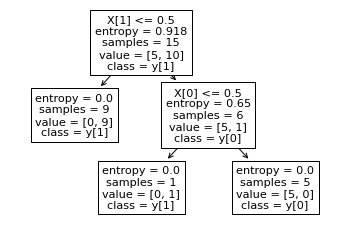

In [3]:
def build_model(data):
    y = data['Class']
    X = data.drop(['Name','Class'], axis=1)

    clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
    clf = clf.fit(X,y)
    
    return clf

data = toy_dataset()
model = build_model(data)
# to visualize tree
plot_tree(model,class_names=True)

In [4]:
data.Class.unique()

array(['mammals', 'non-mammals'], dtype=object)

Prediction for your test data is: 


,Name,Predicted Class,Actual Class
0,gila monster,non-mammals,nom-mammals
1,platypus,non-mammals,mammals
2,owl,non-mammals,non-mammals
3,dolphin,mammals,mammals


confusion matrix:
Decision Tree accuracy:  0.5
Classification Report:


/home/manoj/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/manoj/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/manoj/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,precision,recall,f1-score
mammals,1.0,0.5,0.666667
nom-mammals,0.0,0.0,0.000000


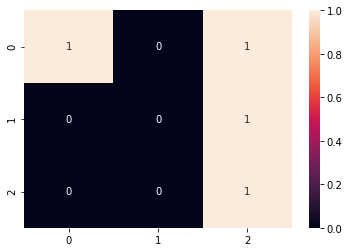

In [5]:
def prediction_using_models(clf):
    test_data = [
        ['gila monster',0,0,0,0,1,1,'nom-mammals'],
        ['platypus',1,0,0,0,1,1,'mammals'],
        ['owl',1,0,0,1,1,0,'non-mammals'],
        ['dolphin',1,1,1,0,0,0,'mammals']
    ]
    titles = ['Name','Warm_blooded','Give_birth','Aquatic_creature','Aerial_creature','Has_legs','Hibernates','Class']
    testData = pd.DataFrame(test_data,columns=titles)
    display_html(test_data)

    y_test = testData['Class']
    x_test = testData.drop(['Name','Class'], axis=1)

    y_pred = clf.predict(x_test)
    predictions = pd.concat([testData['Name'],pd.Series(y_pred, name='Predicted Class'),pd.Series(y_test,name='Actual Class')],axis=1)
    print("Prediction for your test data is: ")
    display_html(predictions)
    model_evaluation(y_pred,y_test)

def model_evaluation(y_pred, y_test):
    print("confusion matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True)

    score = accuracy_score(y_test, y_pred)
    print("Decision Tree accuracy: ", score)

    print("Classification Report:")
    report = classification_report(y_test, y_pred, output_dict = True)
    df = pd.DataFrame(report).transpose()
    display_html(df[['precision','recall','f1-score']].head(2))
prediction_using_models(model)